In [1]:
from joblib import dump,load
import numpy as np

In [2]:
def load_dataset():
    train_set_x_orig = load('prepared_data/train_images.joblib')
    train_set_y = load('prepared_data/train_labels.joblib')
    test_set_x_orig = load('prepared_data/test_images.joblib')
    test_set_y = load('prepared_data/test_labels.joblib')
    return train_set_x_orig, train_set_y, test_set_x_orig, test_set_y

In [3]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y = load_dataset()

In [4]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 17500
Number of testing examples: m_test = 7500
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (17500, 64, 64, 3)
train_set_y shape: (17500, 1)
test_set_x shape: (7500, 64, 64, 3)
test_set_y shape: (7500, 1)


In [5]:
# Reshape the training and test examples

train_set_x_flatten = train_set_x_orig.reshape(-1, train_set_x_orig.shape[0])
test_set_x_flatten = test_set_x_orig.reshape(-1, test_set_x_orig.shape[0])
train_set_y = train_set_y.reshape(1,-1)
test_set_y = test_set_y.reshape(1,-1)

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 17500)
train_set_y shape: (1, 17500)
test_set_x_flatten shape: (12288, 7500)
test_set_y shape: (1, 7500)
sanity check after reshaping: [179  71  79 239  16]


In [6]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [7]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [8]:
def initialize_parameters(dim):
    w = np.zeros((dim,1))
    b = 0
    assert(w.shape == (dim,1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w,b

In [9]:
def propagate(w,b,X,Y):
    
    m = X.shape[1]
    
    Z = np.dot(w.T,X) + b
    A = sigmoid(Z)
    cost = -1/m*(np.sum(Y*np.log(A) + (1-Y)*np.log(1-A)))
    
    dw = (1/m)*(np.dot(X,(A-Y).T))
    db = (1/m)*(np.sum(A-Y))
    
    cost = np.squeeze(cost)
    
    grads = {
        'dw': dw,
        'db': db
    }
    return grads, cost

In [10]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [11]:
def optimize(w,b,X,Y,num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations):
        
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i%100 == 0:
            costs.append(cost)
        
        if print_cost and i%100 == 0:
            print('Cost after iteration {}: {}'.format(i,cost))
        
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [12]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067652


In [13]:
def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    

    A = sigmoid(np.dot(w.T,X)+b)

    
    for i in range(A.shape[1]):
        
        Y_prediction[0,i] = 0 if A[0,i]<=0.5 else 1 
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [14]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [15]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.01, print_cost = False):
    w,b = initialize_parameters(X_train.shape[0])
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w,b = params['w'], params['b']
    
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [16]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.6923466672134787
Cost after iteration 200: 0.6917578209024647
Cost after iteration 300: 0.6912589835600771
Cost after iteration 400: 0.6908115224384154
Cost after iteration 500: 0.6903977386723795
Cost after iteration 600: 0.6900081190469923
Cost after iteration 700: 0.6896369858936762
Cost after iteration 800: 0.6892806717466088
Cost after iteration 900: 0.6889366556368495
Cost after iteration 1000: 0.6886031160922674
Cost after iteration 1100: 0.6882786828497517
Cost after iteration 1200: 0.6879622907495259
Cost after iteration 1300: 0.6876530894428637
Cost after iteration 1400: 0.687350385145762
Cost after iteration 1500: 0.6870536016007658
Cost after iteration 1600: 0.6867622530029216
Cost after iteration 1700: 0.6864759246438974
Cost after iteration 1800: 0.6861942586987573
Cost after iteration 1900: 0.6859169435427452
train accuracy: 56.36571428571428 %
test accuracy: 48.973333333333336 %


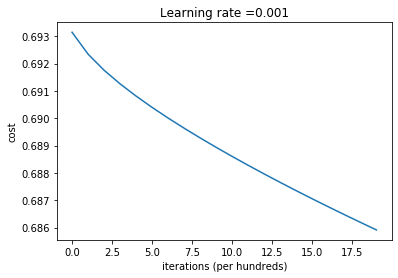

In [18]:
import matplotlib.pyplot as plt
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()